In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('p1.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])

In [5]:
X = df[['Gender','Age','EstimatedSalary']]
Y = df['Purchased']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [9]:
y_hat = lr.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score as AS

In [11]:
accuracy = AS(Y_test, y_hat)
accuracy*100

88.75

Confusion Matrix:
 [[50  2]
 [ 7 21]]


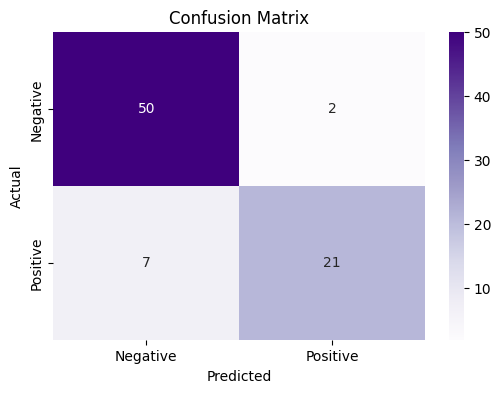

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_hat)
print("Confusion Matrix:\n", cm)


import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
